In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

In [36]:
df=pd.read_csv('Social_Network_Ads.csv')

In [37]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [39]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [40]:
df.drop('User ID', axis=1, inplace=True)

In [41]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [44]:
gender=pd.get_dummies(df['Gender'], drop_first=True)

In [45]:
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [46]:
df=pd.concat([gender, df], axis=1)

In [47]:
df.head()

,Male,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19,19000,0
1,1,Male,35,20000,0
2,0,Female,26,43000,0
3,0,Female,27,57000,0
4,1,Male,19,76000,0


In [48]:
df.drop('Gender', axis=1, inplace=True)

In [49]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [50]:
df.corr()

,Male,Age,EstimatedSalary,Purchased
Male,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


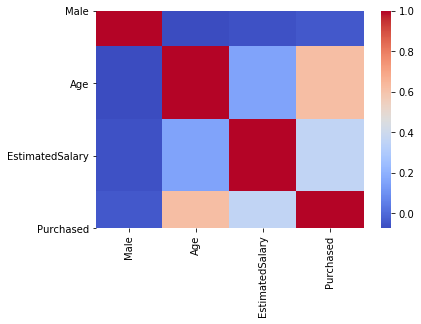

In [51]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [52]:
df.drop('Male', axis=1, inplace=True)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
ss=StandardScaler()

In [55]:
ss.fit(df.drop('Purchased', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [56]:
ss_array=ss.transform(df.drop('Purchased', axis=1))

In [58]:
x=ss_array

In [59]:
y=df['Purchased']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
model=GaussianNB()

In [63]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
ypred=model.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [66]:
confusion_matrix(ypred, y_test)

array([[76,  6],
       [ 8, 30]], dtype=int64)

In [67]:
accuracy_score(y_test, ypred)

0.8833333333333333